# ASSIGNMENT 4
# *YOUR NAME*

## ECO 50213: Advanced Microeconometrics
## March 7, 2025

Please complete your code and text answers in this notebook, then export the notebook to PDF format. Use the online submission feature of Canvas to upload your PDF before 6:00 p.m. on Friday, March 14.

You are encouraged to work together on the assignments. AI tools may be used to assist in coding, debugging, or understanding concepts. However, the final submission must be your own work, written in your own words, and reflect your own understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Question 1: Lead and Mortality

Clay, Troesken, and Haines (2014) show that the use of underground water pipes in cities in the United States increased infant mortality rates in the early 1900s, but only in cities with acidic water supply. More acidic water running through the pipes increases the amount of lead that leaches from the pipes into the water. The paper abstract:

*This paper examines the effect of waterborne lead exposure on infant mortality in American cities over the period 1900 to 1920. Variation across cities in water acidity and the types of service pipes, which together determined the extent of lead exposure, identifies the effects of lead on infant mortality. In 1900, a decline in exposure equivalent to an increase in pH from 6.675 (25th percentile) to 7.3 (50th percentile) in cities with lead-only pipes would have been associated with a decrease in infant mortality of 7% to 33%, or at least twelve fewer infant deaths per 1,000 live births.*

Although the data for the paper is 120 years old, the problem has not gone away. In 2014-16, there was a public health crisis in the city of Flint, Michigan, when the city switched to a cheaper, but more acidic, source for its water supply. Many of the underground pipes in Flint were still made of lead. This leached into the more acidic water and poisoned thousands of Flint children.

The following code will import a subset of the data used in the paper and show the first few observations.

In [2]:
url = "https://raw.githubusercontent.com/sdmcrae/econometrics/master/datasets/lead_mortality.csv"
df = pd.read_csv(url)
print(df.head())

   year       city state        age  hardness   ph   infrate  typhoid_rate  \
0  1900    Alameda    CA  28.954838        97  7.6  0.109756      0.024390   
1  1900     Albany    NY  30.347675        43  7.3  0.298618      0.041445   
2  1900  Allegheny    PA  27.087301       111  7.3  0.446841      0.093991   
3  1900  Allentown    PA  27.764046       176  7.7  0.384181      0.028249   
4  1900    Altoona    PA  27.037533       111  7.3  0.467866      0.043702   

   np_tub_rate  mom_rate  population  precipitation  temperature  lead  \
0     0.030488  0.195122       164.0       1.850307    59.026169     0   
1     0.013815  0.179596       941.0       3.278735    45.267910     1   
2     0.027735  0.192604      1298.0       3.350943    48.971493     1   
3     0.005650  0.197740       354.0       3.350943    48.971493     1   
4     0.007712  0.182519       389.0       3.350943    48.971493     0   

   foreign_share  
0       0.193548  
1       0.184884  
2       0.237302  
3       0.

The variables are defined as follows:
- **year**: Year of observation.
- **city**: Name of the city.
- **state**: State abbreviation.
- **age**: Average age of the population.
- **hardness**: Water hardness index.
- **ph**: Water pH level.
- **infrate**: Infant mortality rate (deaths per 100 in population).
- **typhoid_rate**: Typhoid death rate.
- **np_tub_rate**: Non-pulmonary tuberculosis death rate.
- **mom_rate**: Fraction of population who are women of child-bearing age.
- **population**: City population (in 100s).
- **precipitation**: Average precipitation in the state.
- **temperature**: Average temperature in the state.
- **lead**: Indicator variable (1 = yes, 0 = no) if the city had lead pipes ("lead-only" or "mixed-lead" cities).
- **foreign_share**: Fraction of population who are foreign born.

1. **Difference in means**
   - What was the mean infant mortality rate ($infrate$) in 1900 for the cities with lead pipes ($lead = 1$)?
   - What was the mean infant mortality rate in 1900 for the cities without lead pipes ($lead = 0$)?
   - Perform a hypothesis test with a 5% significance level for the difference in the population mean infant mortality rates, comparing the cities with and without lead pipes.

In [3]:
#What was the mean infant mortality rate ( infrate ) in 1900 for the cities with lead pipes ( lead=1 )?
df_lead = df[(df['year'] == 1900) & (df['lead'] == 1)]
df_lead['infrate'].mean()

0.40325757632478637

In [4]:
df_nolead = df[(df['year'] == 1900) & (df['lead'] == 0)]
df_nolead['infrate'].mean()

0.381167850709091

PRUEBA DE LEVEN EXPLICAR!!

In [5]:
#Perform a hypothesis test with a 5% significance level for the difference in the population mean infant mortality rates, comparing the cities with and without lead pipes.
import scipy.stats as stats
# Assesing equal variance
stat, p_value = stats.levene(df_lead['infrate'], df_nolead['infrate'])
print(f"Estadístico de Levene: {stat:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza H0: Se puede asumir igualdad de varianzas.")
else:
    print("Se rechaza H0: No se pueden asumir varianzas iguales.")

Estadístico de Levene: 0.1483
P-valor: 0.7007
No se rechaza H0: Se puede asumir igualdad de varianzas.


In [6]:
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(df_lead['infrate'], df_nolead['infrate'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the mean infant mortality rates between cities with and without lead pipes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean infant mortality rates between cities with and without lead pipes.")

T-statistic: 0.8923418246418116
P-value: 0.3734710996478121
Fail to reject the null hypothesis: There is no significant difference in the mean infant mortality rates between cities with and without lead pipes.


2. **Interaction between two indicator variables**
   - The amount of lead leached from the pipes depends on the acidity of the water. The pH scale ranges from 0 to 14, with a pH of less than 7 considered acidic and a pH of more than 7 considered alkaline. Create an indicator variable $acid$ that is equal to 1 if the pH of the city water supply is less than 7, and 0 otherwise.
   - Run the following regression:

   $InfMortality_i = \beta_0 + \beta_1 lead_i + \beta_2 acid_i + \beta_3 lead_i \times acid_i + u_i$

   - Carefully explain each of the four coefficients in this regression.
   - Test the null hypothesis that there is no relationship between lead pipes and infant mortality. That is, test $H_0: \beta_1 = 0 \text{ and } \beta_3 = 0$ against the alternative hypothesis $H_1: \beta_1 \ne 0 \text{ or } \beta_3 \ne 0$. Remember to use heteroskedasticity-consistent standard errors for all of your hypothesis tests.

In [7]:
df['acid'] = (df['ph'] < 7).astype(int)

In [8]:
#Run regression
model = smf.ols('infrate ~ lead + acid + lead * acid', data=df).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                infrate   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     10.39
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           2.62e-06
Time:                        17:41:43   Log-Likelihood:                 99.923
No. Observations:                 172   AIC:                            -191.8
Df Residuals:                     168   BIC:                            -179.3
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3452      0.029     11.863      0.0

In [9]:
# Define the restriction: X2 = 0 and Interaction = 0
hypothesis = 'lead = 0, lead:acid = 0'

# Run the F-test
f_test_result = model.f_test(hypothesis)

# Print results
print(f"F-statistic: {f_test_result.statistic:.4f}")
print(f"P-value: {f_test_result.pvalue:.4f}")

# Interpretation
alpha = 0.05
if f_test_result.pvalue < alpha:
    print("Reject H0: At least one of the parameters is significantly different from zero.")
else:
    print("Fail to reject H0: The two parameters are jointly insignificant.")


F-statistic: 4.8106
P-value: 0.0093
Reject H0: At least one of the parameters is significantly different from zero.


In [10]:
# Define restriction matrix R (testing X2 = 0 and Interaction = 0)
R = np.array([[0, 1, 0, 0],  # Tests X2 = 0
              [0, 0, 0, 1]])  # Tests Interaction = 0

# Define the null hypothesis values (both coefficients should be 0 under H0)
r = np.array([0, 0])

# Run the F-test using the matrix method
f_test_result = model.f_test((R, r))

# Print results
print(f"F-statistic: {f_test_result.statistic:.4f}")
print(f"P-value: {f_test_result.pvalue:.4f}")

# Interpretation
alpha = 0.05
if f_test_result.pvalue < alpha:
    print("Reject H0: At least one parameter (X1 or Interaction) is significant.")
else:
    print("Fail to reject H0: X1 and Interaction are jointly insignificant.")

F-statistic: 4.8106
P-value: 0.0093
Reject H0: At least one parameter (X1 or Interaction) is significant.


3. **Interaction between an indicator and a continuous variable**
   - Create a scatter graph to show the relationship between infant mortality and the pH of the water supply. Use different colors or markers to separate the cities with and without lead pipes. Show two linear regression lines for the regression of infant mortality on water pH, one line for the cities with lead pipes and another line for the cities without lead pipes.
   - Run the following regression. Note that this regression has the same format as the regression in (2). The difference is that the indicator variable $acid_i$ is replaced with the continuous variable $ph_i$.

   $InfMortality_i = \beta_0 + \beta_1 lead_i + \beta_2 ph_i + \beta_3 lead_i \times ph_i + u_i$

   - Explain the relationship between the four coefficients in this regression and the two linear regression lines that you included on your scatter graph.
   - For cities with lead pipes, predict the infant mortality rate for a pH of 6.675 and for a pH of 7.3. By how much would an increase in pH from 6.675 to 7.3 have reduced infant mortality? Compare your answer to the result in the abstract of the paper.

In [11]:
# Ejemplo de regresión lineal
slope_lead, intercept_lead = np.polyfit(df_lead['ph'],df_lead['infrate'] , 1)  # Encuentra pendiente e intercepto

# Genera la línea de regresión
y_regression_lead = slope_lead * df_lead['ph'] + intercept_lead

In [12]:
# Ejemplo de regresión lineal
slope_nolead, intercept_nolead = np.polyfit(df_nolead['ph'],df_nolead['infrate'] , 1)  # Encuentra pendiente e intercepto

# Genera la línea de regresión
y_regression_nolead = slope_nolead * df_nolead['ph'] + intercept_nolead

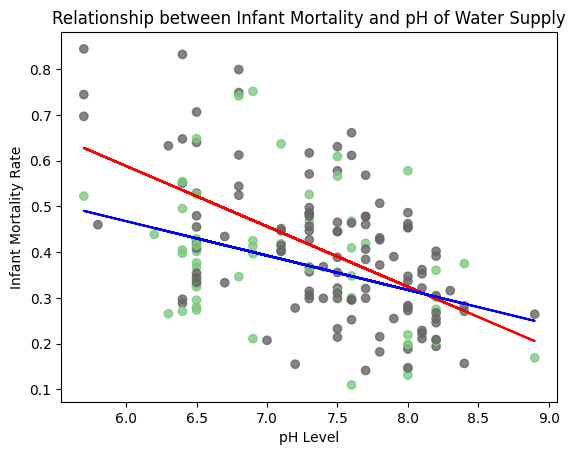

In [13]:
plt.scatter(df['ph'],df['infrate'], alpha=0.8, c=df['lead'], cmap='Accent')  # Use 'lead' column for color mapping
plt.plot(df_lead['ph'], y_regression_lead, color='red', label='Lead Pipes')
plt.plot(df_nolead['ph'], y_regression_nolead, color='blue', label='No Lead Pipes')
plt.xlabel("pH Level")  # Add label for x-axis
plt.ylabel("Infant Mortality Rate")  # Add label for y-axis
plt.title("Relationship between Infant Mortality and pH of Water Supply")  # Add title
plt.show()

In [14]:
model = smf.ols('infrate ~ lead + ph + lead * ph', data=df).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                infrate   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     21.47
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           8.00e-12
Time:                        17:41:50   Log-Likelihood:                 108.52
No. Observations:                 172   AIC:                            -209.0
Df Residuals:                     168   BIC:                            -196.5
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9189      0.149      6.178      0.0

In [15]:
new_data = pd.DataFrame({
    'lead': [1, 1],  # Valores de ejemplo para lead_pipes
    'ph': [6.675, 7.3],  # Valores de ejemplo para control_1
})
print(model.predict(new_data))
print(model.predict(new_data)[0]-model.predict(new_data)[1])

0    0.499326
1    0.416800
dtype: float64
0.08252585664851625


In [16]:
#For cities with lead pipes, predict the infant mortality rate for a pH of 6.675 and for a pH of 7.3
y1=model.params.iloc[0]+model.params.iloc[1]*1+model.params.iloc[2]*6.675+model.params.iloc[3]*6.675
y2=model.params.iloc[0]+model.params.iloc[1]*1+model.params.iloc[2]*7.3+model.params.iloc[3]*7.3
print(y2-y1)

-0.08252585664851625


4. **Control variables**
   - Consider the following variables: (i) % of foreign-born population ($foreign\_share$), (ii) death rate from typhoid ($typhoid\_rate$), (iii) death rate from non-pulmonary tuberculosis ($np\_tub\_rate$), (iv) average temperature ($temperature$), and (v) average rainfall ($precipitation$). Is exclusion of these variables likely to lead to omitted variable bias? Explain your answer. It may be helpful to read Section IV(b) of the paper.
   - Run the same regression in (3) again, this time including the additional five control variables above. Do your estimates on the $lead$ variable and its interaction with $ph$ change? Using the regression with the control variables included, test the null hypothesis that there is no relationship between lead pipes and infant mortality.

In [17]:
model = smf.ols('infrate ~ lead + ph + lead * ph + foreign_share + typhoid_rate + np_tub_rate + temperature + precipitation', data=df).fit(cov_type='HC0')

# Ver el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                infrate   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     17.54
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.04e-18
Time:                        17:41:54   Log-Likelihood:                 137.41
No. Observations:                 172   AIC:                            -256.8
Df Residuals:                     163   BIC:                            -228.5
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0962      0.183     -0.525

In [18]:
hypothesis = 'lead = 0'

# Perform the t-test on the hypothesis
t_test_result = model.t_test(hypothesis)

# Display the test result
print(t_test_result)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4053      0.178      2.271      0.023       0.056       0.755


## Question 2: Bride Price and Female Education

Ashraf, Bau, Nunn, and Voena (2020) show that the bride price, a payment made by the husband to the bride's family at marriage, is increasing in the bride's level of education. This creates an additional monetary incentive for parents to invest in their daughters' education. The authors use data from Indonesia and Zambia to show that the bride price custom increases the responsiveness of female education to policies that reduce the cost of schooling.

In this question, we will replicate the descriptive results for Indonesia about the relationship between bride price and education levels.

The following code imports a subset of the Indonesian data used in the paper.

In [19]:
url = "https://raw.githubusercontent.com/sdmcrae/econometrics/master/datasets/bride_price.csv"
df = pd.read_csv(url)
print(df.head())

   log_dowry  elementary_plus  junior_plus  college ethnicity    year  \
0        NaN              0.0          0.0      0.0  Tionghoa  2007.0   
1  10.203592              1.0          0.0      0.0      95.0  2007.0   
2  13.091905              1.0          1.0      1.0    Minang  2007.0   
3   9.210340              1.0          1.0      1.0    Minang  2007.0   
4        NaN              1.0          1.0      0.0    Minang  2007.0   

   mar_year  mar_age  husband_elementary  husband_junior  husband_college  \
0    1968.0      NaN                 0.0             0.0              0.0   
1    1982.0     24.0                 1.0             1.0              0.0   
2    2007.0      NaN                 1.0             1.0              1.0   
3    1992.0     34.0                 0.0             0.0              0.0   
4    2003.0     23.0                 1.0             1.0              1.0   

   husband_mar_age  pre_marriage_asset  muslim  multiple_wives  
0             48.0               

The variables are defined as follows:
- **log_dowry**: The natural logarithm of the bride price payment received.
- **elementary_plus**: Indicator variable (1 = yes, 0 = no) for whether the wife completed elementary school.
- **junior_plus**: Indicator variable (1 = yes, 0 = no) for whether the wife completed junior secondary school.
- **college**: Indicator variable (1 = yes, 0 = no) for whether the wife attended college.
- **ethnicity**: The ethnic group of the wife.
- **year**: The year of the IFLS survey round.
- **mar_year**: The year the couple got married.
- **mar_age**: The wife's age at the time of marriage.
- **husband_elementary**: Indicator variable (1 = yes, 0 = no) for whether the husband completed elementary school.
- **husband_junior**: Indicator variable (1 = yes, 0 = no) for whether the husband completed junior secondary school.
- **husband_college**: Indicator variable (1 = yes, 0 = no) for whether the husband attended college.
- **husband_mar_age**: The husband's age at the time of marriage.
- **pre_marriage_asset**: A measure of the wife's premarital wealth.
- **muslim**: Indicator variable (1 = yes, 0 = no) for whether the wife reports being Muslim.
- **multiple_wives**: Indicator variable (1 = yes, 0 = no) for whether the marriage is polygynous (i.e., the husband has multiple wives).

1. **Replication**
   - Use this dataset to replicate the first five columns of **Table 4** in the paper.
   - You will need to create the squared terms in the marriage year, the wife's and husband's age at marriage, and the log of (1 + the wife's pre-marriage assets).
   - Observations from the Minang ethnic group should be dropped (why?).
   - Please show your results in a correctly formatted table with one regression per column. An easy way to do with is with `etable` from the `pyfixest` package. See the minimum working example at this link: https://py-econometrics.github.io/pyfixest/table-layout.html.

In [26]:
df_filtered = df[df['ethnicity'] != 'Konghucu']
df_filtered['mar_year_squared'] = df_filtered['mar_year'] ** 2
df_filtered['husband_mar_age_squared'] = df_filtered['husband_mar_age'] ** 2
df_filtered['log_pre_marriage_asset'] = np.log(1 + df_filtered['pre_marriage_asset'])
df_filtered['wife_mar_age_squared'] = df_filtered['mar_age'] ** 2
df_filtered.head()


,log_dowry,elementary_plus,junior_plus,college,ethnicity,year,mar_year,mar_age,husband_elementary,husband_junior,husband_college,husband_mar_age,pre_marriage_asset,muslim,multiple_wives,mar_year_squared,husband_mar_age_squared,log_pre_marriage_asset,wife_mar_age_squared
0,NaN,0.0,0.0,0.0,Tionghoa,2007.0,1968.0,NaN,0.0,0.0,0.0,48.0,NaN,0.0,0.0,3873024.0,2304.0,NaN,NaN
1,10.203592,1.0,0.0,0.0,95.0,2007.0,1982.0,24.0,1.0,1.0,0.0,25.0,0.0,1.0,0.0,3928324.0,625.0,0.000000,576.0
2,13.091905,1.0,1.0,1.0,Minang,2007.0,2007.0,NaN,1.0,1.0,1.0,29.0,NaN,1.0,0.0,4028049.0,841.0,NaN,NaN
3,9.210340,1.0,1.0,1.0,Minang,2007.0,1992.0,34.0,0.0,0.0,0.0,27.0,NaN,1.0,0.0,3968064.0,729.0,NaN,1156.0
4,NaN,1.0,1.0,0.0,Minang,2007.0,2003.0,23.0,1.0,1.0,1.0,30.0,1000000.0,1.0,0.0,4012009.0,900.0,13.815512,529.0


In [31]:
!pip install pylatex
!pip install great_tables
!pip install pyfixest
import numpy as np
import pandas as pd
import pylatex as pl  # for the latex table; note: not a dependency of pyfixest - needs manual installation
from great_tables import loc, style
from IPython.display import FileLink, display
import pyfixest as pf

%load_ext autoreload
%autoreload 2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.7 MB/s eta 0:00:00


In [62]:
fit1 = pf.feols("log_dowry ~ elementary_plus + junior_plus + college |mar_year + mar_year_squared + ethnicity  ", data=df_filtered,vcov='HC1')
fit2 = pf.feols("log_dowry ~ elementary_plus + junior_plus + college |mar_year + mar_year_squared + ethnicity + wife_mar_age_squared + mar_age", data=df_filtered,vcov='HC1')
fit3 = pf.feols("log_dowry ~ elementary_plus + junior_plus + college + husband_elementary + husband_junior + husband_college | mar_year + mar_year_squared + ethnicity + wife_mar_age_squared + mar_age", data=df_filtered,vcov='HC1')
fit4 = pf.feols("log_dowry ~ elementary_plus + junior_plus + college + husband_elementary + husband_junior + husband_college | mar_year + mar_year_squared + ethnicity + wife_mar_age_squared + mar_age + husband_mar_age_squared + husband_mar_age", data=df_filtered,vcov='HC1')
fit5 = pf.feols("log_dowry ~ elementary_plus + junior_plus + college + husband_elementary + husband_junior + husband_college | mar_year + mar_year_squared + ethnicity + wife_mar_age_squared + mar_age + husband_mar_age_squared + husband_mar_age + log_pre_marriage_asset + muslim +multiple_wives", data=df_filtered,vcov='HC1')

In [75]:
predicted_means = [round(fit.predict().mean(),3) for fit in [fit1,fit2,fit3,fit4,fit5]]
predicted_se = [round(fit.predict().std(),3) for fit in [fit1,fit2,fit3,fit4,fit5]]

In [95]:
pf.etable([fit1,fit2,fit3,fit4,fit5], custom_model_stats={"Mean Dep. Var.": predicted_means, "Std. Dev. Dep. Var.": predicted_se})


GT(_tbl_data=   level_0                  level_1                      0  \
0     coef          elementary_plus  0.615*** <br> (0.064)   
1     coef              junior_plus  0.664*** <br> (0.064)   
2     coef                  college  0.838*** <br> (0.073)   
3     coef       husband_elementary                          
4     coef           husband_junior                          
5     coef          husband_college                          
6       fe          husband_mar_age                      -   
7       fe                 mar_year                      x   
8       fe   log_pre_marriage_asset                      -   
9       fe                ethnicity                      x   
10      fe  husband_mar_age_squared                      -   
11      fe                   muslim                      -   
12      fe         mar_year_squared                      x   
13      fe                  mar_age                      -   
14      fe           multiple_wives                      -   
15      fe     wife_mar_age_squared                      -   
16   stats           Mean Dep. Var.                 11.422   
17   stats      Std. Dev. Dep. Var.                  1.709   
18   stats             Observations                   5886   
19   stats                S.E. type                 hetero   
20   stats            R<sup>2</sup>                  0.499   

                        1                      2                      3  \
0   0.585*** <br> (0.070)  0.380*** <br> (0.074)  0.383*** <br> (0.075)   
1   0.622*** <br> (0.069)  0.439*** <br> (0.073)  0.436*** <br> (0.074)   
2   0.809*** <br> (0.076)  0.466*** <br> (0.085)  0.432*** <br> (0.087)   
3                           0.225** <br> (0.079)    0.185* <br> (0.081)   
4                          0.418*** <br> (0.075)  0.426*** <br> (0.077)   
5                          0.507*** <br> (0.086)  0.511*** <br> (0.086)   
6                       -                      -                      x   
7                       x                      x                      x   
8                       -                      -                      -   
9                       x                      x                      x   
10                      -                      -                      x   
11                      -                      -                      -   
12                      x                      x                      x   
13                      x                      x                      x   
14                      -                      -                      -   
15                      x                      x                      x   
16                 11.416                 11.475                 11.529   
17                  1.708                  1.701                  1.653   
18                   5396                   5000                   4815   
19                 hetero                 hetero                 hetero   
20                  0.503                  0.510                  0.503   

                        4  
0    0.286** <br> (0.108)  
1   0.380*** <br> (0.096)  
2     0.243* <br> (0.110)  
3      0.051 <br> (0.114)  
4   0.444*** <br> (0.101)  
5   0.373*** <br> (0.105)  
6                       x  
7                       x  
8                       x  
9                       x  
10                      x  
11                      x  
12                      x  
13                      x  
14                      x  
15                      x  
16                 12.294  
17                   1.35  
18                   2295  
19                 hetero  
20                  0.466  , _body=<great_tables._gt_data.Body object at 0x7c4709c129d0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<Col

2. **Interpretation of coefficients**
   - Using the coefficients from Column 2, what is the effect on the bride price of a woman completing elementary school, relative to not completing elementary school?
   - Again using the coefficients from Column 2, what is the effect on the bride price of a woman attending college, relative to not completing elementary school?
   - Compare your answers to the interpretation of these coefficients in the paper (Page 613). What do you notice?

3. **Correlated regressors**
   - Compare the estimated coefficients on the female education indicators in Columns 1 and 3 of your table. What happens to the standard errors for these coefficients between Columns 1 and 3?
   - Explain the reason for the change in the estimated coefficients and their standard errors.

4. **Log transformations with zeros**
   - What is the coefficient on the `log(1 + pre_marriage_asset)` variable in Column 5? Interpret this coefficient.
   - It is common in applied work to add 1 to a variable before taking logs to avoid undefined values from taking the log of zero. Discuss the problems with this approach (you may want to search the internet or ask your favorite AI).
   - An alternative approach to `log(1+x)` is to use the inverse hyperbolic sine transformation. Run the regression with the inverse hyperbolic sine of pre-marriage assets. Compare the coefficients to your answer above.
   - Another alternative is to use `log(pre_marriage_asset)`, set the undefined values to zero, and add an indicator variable for "zero pre-marriage assets". Run the regression in Column 5 with these two variables instead of `log(1 + pre_marriage_asset)`. Interpret the coefficients.
   - Create a scatter graph to show the relationship between `log(bride price)` and `log(pre_marriage_asset)` (setting undefined values to zero). What do you notice? Why is it better to use the third approach with the indicator variable?

In [ ]:
#use log(pre_marriage_asset), set the undefined values to zero, and add an indicator variable for "zero pre-marriage assets"


In [99]:
df_filtered['arcsinh']=df_filtered['pre_marriage_asset'].apply(lambda x: np.arcsinh(x))

df_filtered['log'] = df_filtered['pre_marriage_asset'].apply(lambda x: np.log(x) if x>0 else np.NaN)

df_filtered['log_0'] = df_filtered['log'].fillna(0)
df_filtered['indicator']=df_filtered['log_0'].apply(lambda x: 1 if x==0 else 0)
# Show the updated dataframe
df_filtered

,log_dowry,elementary_plus,junior_plus,college,ethnicity,year,mar_year,mar_age,husband_elementary,husband_junior,...,multiple_wives,mar_year_squared,husband_mar_age_squared,log_pre_marriage_asset,wife_mar_age_squared,arcsinh,log,indicator,log_0,pre_marriage_asset_0
0,NaN,0.0,0.0,0.0,Tionghoa,2007.0,1968.0,NaN,0.0,0.0,...,0.0,3873024.0,2304.0,NaN,NaN,NaN,NaN,0,0.000000,0.0
1,10.203592,1.0,0.0,0.0,95.0,2007.0,1982.0,24.0,1.0,1.0,...,0.0,3928324.0,625.0,0.000000,576.0,0.000000,NaN,1,0.000000,0.0
2,13.091905,1.0,1.0,1.0,Minang,2007.0,2007.0,NaN,1.0,1.0,...,0.0,4028049.0,841.0,NaN,NaN,NaN,NaN,0,0.000000,0.0
3,9.210340,1.0,1.0,1.0,Minang,2007.0,1992.0,34.0,0.0,0.0,...,0.0,3968064.0,729.0,NaN,1156.0,NaN,NaN,0,0.000000,0.0
4,NaN,1.0,1.0,0.0,Minang,2007.0,2003.0,23.0,1.0,1.0,...,0.0,4012009.0,900.0,13.815512,529.0,14.508658,13.815511,0,13.815511,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0
8265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0
8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0
8267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0


In [100]:
fit6 = pf.feols("log_dowry ~ elementary_plus + junior_plus + college + husband_elementary + husband_junior + husband_college | mar_year + mar_year_squared + ethnicity + wife_mar_age_squared + mar_age + husband_mar_age_squared + husband_mar_age + arcsinh + muslim +multiple_wives", data=df_filtered,vcov='HC1')
fit7 = pf.feols("log_dowry ~ elementary_plus + junior_plus + college + husband_elementary + husband_junior + husband_college | mar_year + mar_year_squared + ethnicity + wife_mar_age_squared + mar_age + husband_mar_age_squared + husband_mar_age + log + indicator + muslim +multiple_wives", data=df_filtered,vcov='HC1')

In [101]:
pf.etable([fit5,fit6,fit7], model_heads=['fit5','fit6','fit7'])

GT(_tbl_data=   level_0                  level_1                      0  \
0     coef          elementary_plus   0.286** <br> (0.108)   
1     coef              junior_plus  0.380*** <br> (0.096)   
2     coef                  college    0.243* <br> (0.110)   
3     coef       husband_elementary     0.051 <br> (0.114)   
4     coef           husband_junior  0.444*** <br> (0.101)   
5     coef          husband_college  0.373*** <br> (0.105)   
6       fe          husband_mar_age                      x   
7       fe                      log                      -   
8       fe                  arcsinh                      -   
9       fe                 mar_year                      x   
10      fe   log_pre_marriage_asset                      x   
11      fe                ethnicity                      x   
12      fe  husband_mar_age_squared                      x   
13      fe                indicator                      -   
14      fe                   muslim                      x   
15      fe         mar_year_squared                      x   
16      fe                  mar_age                      x   
17      fe           multiple_wives                      x   
18      fe     wife_mar_age_squared                      x   
19   stats             Observations                   2295   
20   stats                S.E. type                 hetero   
21   stats            R<sup>2</sup>                  0.466   

                        1                      2  
0    0.286** <br> (0.108)    0.269* <br> (0.127)  
1   0.380*** <br> (0.096)   0.368** <br> (0.118)  
2     0.243* <br> (0.110)    0.250* <br> (0.125)  
3      0.051 <br> (0.114)     0.113 <br> (0.135)  
4   0.444*** <br> (0.101)  0.418*** <br> (0.121)  
5   0.373*** <br> (0.105)   0.315** <br> (0.118)  
6                       x                      x  
7                       -                      x  
8                       x                      -  
9                       x                      x  
10                      -                      -  
11                      x                      x  
12                      x                      x  
13                      -                      x  
14                      x                      x  
15                      x                      x  
16                      x                      x  
17                      x                      x  
18                      x                      x  
19                   2295                   1665  
20                 hetero                 hetero  
21                  0.466                  0.486  , _body=<great_tables._gt_data.Body object at 0x7c4709d5abd0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7c4709bb8e90>, _spanners=Spanners([SpannerInfo(spanner_id='log_dowry', spanner_level=2, spanner_label='log_dowry', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None), SpannerInfo(spanner_id='fit5', spanner_level=1, spanner_label='fit5', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='fit6', spanner_level=1, spanner_label='fit6', spanner_units=None, spanner_pattern=None, vars=['1'], built=None), SpannerInfo(spanner_id='fit7', spanner_level=1, spanner_label='fit7', spanner_units=None, spanner_pattern=None, vars=['2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None),

In [105]:
df_filtered['log_pre_marriage_asset_0'] = df_filtered['log_pre_marriage_asset'].fillna(0)

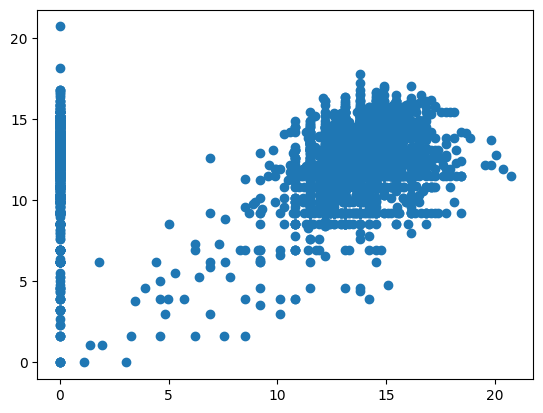

In [106]:
plt.scatter(df_filtered['log_pre_marriage_asset'],df_filtered['log_dowry'])
